### importing packeges

In [1]:
### importing packeges 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt

%matplotlib inline

### import data

In [2]:
### file path
file_path = 'C:/Data_set/'
claims = pd.read_csv(file_path+'claims.csv')
demographics = pd.read_csv(file_path+'cust_demographics.csv')

### Data Inspection of claims

In [3]:
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [4]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [5]:
claims.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

### Data Inspection of demographics

In [6]:
demographics

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [7]:
demographics.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment'], dtype='object')

In [8]:
claims.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent'],
      dtype='object')

In [9]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


### merging the data set

In [10]:
insurance_claim=pd.merge(left=claims, right=demographics, how='inner', left_on='customer_id', right_on='CUST_ID', indicator= True)

In [11]:
insurance_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,both
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,both
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,both
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,both
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,both
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,both
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,both
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,both


### 1

In [12]:
insurance_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,both
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,both
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,both
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,both
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,both
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,both
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,both
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,both


### 2

In [13]:
insurance_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   claim_id             1085 non-null   int64   
 1   customer_id          1085 non-null   int64   
 2   incident_cause       1085 non-null   object  
 3   claim_date           1085 non-null   object  
 4   claim_area           1085 non-null   object  
 5   police_report        1085 non-null   object  
 6   claim_type           1085 non-null   object  
 7   claim_amount         1020 non-null   object  
 8   total_policy_claims  1075 non-null   float64 
 9   fraudulent           1085 non-null   object  
 10  CUST_ID              1085 non-null   int64   
 11  gender               1085 non-null   object  
 12  DateOfBirth          1085 non-null   object  
 13  State                1085 non-null   object  
 14  Contact              1085 non-null   object  
 15  Segment              

### These variable datatypes appear to be incorrect: CLAIM DATE, CLAIM AMOUNT, and DATE OF BIRTH.

Contact variable is to be in numeric, however as of now keeping it as object only because analysis on contact detail is very rare

In [14]:
insurance_claim_new = insurance_claim.copy() #### keeping orginal data, and copying it to new df

In [15]:
insurance_claim_new.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,both
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,both


### claim_amt

In [16]:
insurance_claim_new['claim_amount'] = pd.to_numeric(insurance_claim_new.claim_amount.str.replace('$',''), downcast='float')

C:\Users\Mantu\AppData\Local\Temp/ipykernel_11748/3803123314.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  insurance_claim_new['claim_amount'] = pd.to_numeric(insurance_claim_new.claim_amount.str.replace('$',''), downcast='float')


### claim_date

In [17]:
insurance_claim_new['claim_date']= pd.to_datetime(insurance_claim_new.claim_date, format='%m/%d/%Y')

### DateofBirth

In [18]:
insurance_claim_new['DateOfBirth']=pd.to_datetime(insurance_claim_new.DateOfBirth, format='%d-%b-%y')

In [19]:
insurance_claim_new['DateOfBirth']=np.where(insurance_claim_new.DateOfBirth.dt.year>2022,
                                           insurance_claim_new.DateOfBirth-pd.offsets.DateOffset(years = 100),
                                           insurance_claim_new.DateOfBirth)

### final_output

In [20]:
insurance_claim_new

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,both
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,both
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,both
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,both
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,both
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,both
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,both
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,both


In [21]:
insurance_claim_new.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
_merge                       category
dtype: object

In [22]:
### contineuos variable data audit

In [23]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [24]:
cont_var_aduit = insurance_claim_new[['claim_amount']].apply(continuous_var_summary)

In [25]:
cont_var_aduit

,claim_amount
dtype,float32
cardinality,676
n_tot,1085
n,1020
nmiss,65
perc_miss,5.990783
sum,12717035.0
mean,12467.68457
std,13783.254883
var,189978128.0


### categorical_var_audit

In [26]:
cat_var_audit=insurance_claim_new[insurance_claim_new.columns].astype('category').describe()

In [27]:
cat_var_audit

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge
count,1085,1085,1085,1085,1085,1085,1085,1020.0,1075.0,1085,1085,1085,1085,1085,1085,1085,1085
unique,1085,1078,5,100,2,3,3,676.0,8.0,2,1078,2,1078,50,1078,3,1
top,26832,21831191,Other causes,2018-04-04 00:00:00,Auto,No,Material only,2320.0,1.0,No,21831191,Male,1972-10-18 00:00:00,NY,914-342-8239,Gold,both
freq,1,2,285,18,970,621,653,7.0,785.0,838,2,556,2,31,2,375,1085


### 3

In [28]:
insurance_claim_new.head(2) ### completed in above steps

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,both
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,both


### 4

### @ considering unknown as no, @ considering yes as 0, since it is easy to count unreported cust

In [29]:
insurance_claim_new['alert_flag'] = np.where(insurance_claim_new.police_report=='Yes',0, 1)

In [30]:
insurance_claim_new[['police_report','alert_flag']]

,police_report,alert_flag
0,No,1
1,Unknown,1
2,No,1
3,No,1
4,No,1
...,...,...
1080,Yes,0
1081,No,1
1082,Yes,0
1083,No,1


### 5

In [31]:
ins_dup=insurance_claim_new.drop_duplicates(subset=['customer_id', 'CUST_ID'], keep='first')

In [32]:
ins_dup

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge,alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,both,1
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,both,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,both,1
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,both,1
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,both,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,both,0
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,both,1
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,both,0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,both,1


### 6

In [33]:
ins_dup.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
_merge                  0
alert_flag              0
dtype: int64

### missing value: claim_amount, total_policy_claims  

##### claim_amount

In [34]:
ins_dup.claim_amount.mean() ## before imputation

12470.501953125

In [35]:
meann=ins_dup.claim_amount.mean()

In [36]:
ins_dup["claim_amount"].fillna(meann, inplace=True)

C:\Users\Mantu\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [37]:
ins_dup.claim_amount.mean() ## after imputation

12470.51953125

In [38]:
ins_dup.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
_merge                  0
alert_flag              0
dtype: int64

##### total_policy_claims

In [39]:
modee=ins_dup.total_policy_claims.mode()[0]

In [40]:
ins_dup["total_policy_claims"].fillna(modee, inplace=True)

In [41]:
ins_dup.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
_merge                 0
alert_flag             0
dtype: int64

In [42]:
ins_dup.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge,alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,both,1
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,both,1


### 7

In [43]:
ins_dup.insert(loc=18, column='age', value=pd.Timestamp.now().year - ins_dup.DateOfBirth.dt.year ) 

In [44]:
condi=[ (ins_dup.age <= 18), ((ins_dup.age>18) & (ins_dup.age<=30)),
       ((ins_dup.age>30) & (ins_dup.age<=60)), (ins_dup.age>60)]

In [45]:
valuu=[('children'), ('youth'), ('Adult'), ('Senior')]

In [46]:
ins_dup["age_group"]=np.select(condi, valuu)

C:\Users\Mantu\AppData\Local\Temp/ipykernel_11748/2998248374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins_dup["age_group"]=np.select(condi, valuu)


In [47]:
ins_dup

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge,alert_flag,age,age_group
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,both,1,43,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,both,1,52,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,both,1,38,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,both,1,36,Adult
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,both,1,45,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,both,0,41,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,42364152,Female,1996-07-07,ID,529-462-1635,Silver,both,1,26,youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,19888166,Male,1990-04-11,WI,712-651-9613,Gold,both,0,32,Adult
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,11256802,Female,1964-10-22,LA,469-345-5617,Silver,both,1,58,Adult


### 8

In [48]:
ins_dup.groupby('Segment')['claim_amount'].mean()

Segment
Gold        12756.479492
Platinum    12369.304688
Silver      12269.435547
Name: claim_amount, dtype: float32

### 9

In [49]:
ins_dup[(ins_dup.claim_date>'2018-9-11')&(ins_dup.claim_date<='2018-9-30')].groupby(
    'incident_cause')['claim_amount'].sum()

incident_cause
Crime                   6840.000000
Driver error           14600.501953
Natural causes          8418.000000
Other causes          244986.500000
Other driver error     47599.500000
Name: claim_amount, dtype: float32

### 10

In [50]:
adultt=pd.DataFrame(ins_dup.groupby(['customer_id','age_group', 'State', 'incident_cause'])['claim_amount'].sum()).reset_index()

In [51]:
adultt

,customer_id,age_group,State,incident_cause,claim_amount
0,154557,Adult,DE,Driver error,12470.501953
1,263204,Adult,TX,Other causes,39192.000000
2,287476,Adult,FL,Natural causes,1621.500000
3,441097,Adult,CA,Other causes,37040.000000
4,524545,Adult,NC,Other driver error,35250.000000
...,...,...,...,...,...
1073,99674324,Adult,UT,Other causes,21480.000000
1074,99723844,Adult,HI,Natural causes,14360.000000
1075,99761663,Adult,NC,Natural causes,1242.000000
1076,99892000,youth,OR,Driver error,2415.000000


In [52]:
adultt=adultt.loc[(adultt.age_group=='Adult') & 
                  (adultt.State.isin(['TX', 'DE', 'AK'])) & 
                  (adultt.incident_cause.isin(['Driver error']))]

In [53]:
adultt.groupby('State')['customer_id'].count()

State
AK    5
DE    7
TX    5
Name: customer_id, dtype: int64

### 11

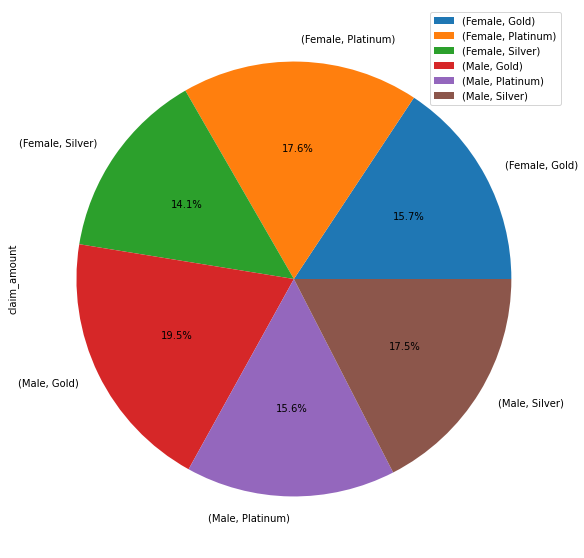

In [54]:
pd.DataFrame(ins_dup.groupby(['gender', 'Segment'])['claim_amount'].sum()).plot(kind='pie', 
                                                                                subplots=True, 
                                                                                figsize=(10,10), 
                                                                                autopct="%.1f%%")
plt.show()

### 12

In [55]:
fema=pd.DataFrame(ins_dup.groupby(['gender','incident_cause'])['claim_amount'].sum()).reset_index()

In [56]:
fema=fema.loc[fema.incident_cause.isin(['Driver error', 'Other driver error'])]

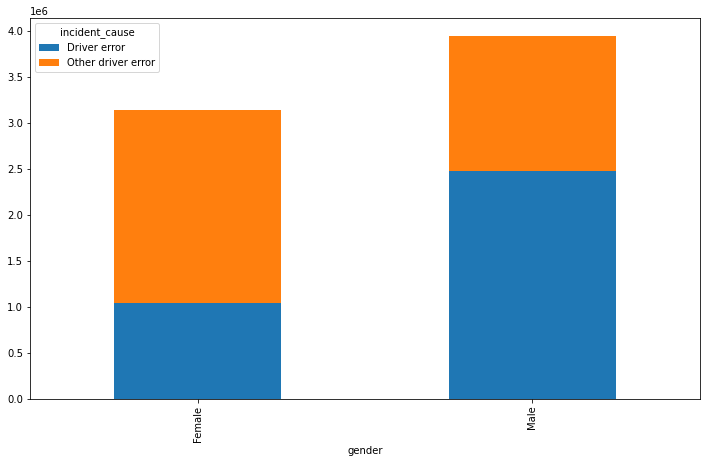

In [57]:
fema.pivot(index='gender', columns='incident_cause', 
           values='claim_amount').plot(kind='bar', figsize=(12,7), stacked = True)
plt.show()

### 13

In [58]:
ins_dup.groupby('age_group')['fraudulent'].count()

age_group
Adult     798
Senior     49
youth     231
Name: fraudulent, dtype: int64

In [59]:
frd=ins_dup[ins_dup.fraudulent=='Yes']

In [60]:
frd.groupby('age_group')['claim_amount'].sum()

age_group
Adult     2664438.5
Senior     124188.5
youth      428666.5
Name: claim_amount, dtype: float32

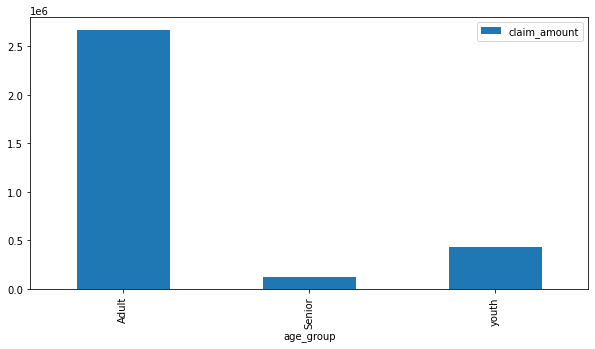

In [61]:
pd.DataFrame(frd.groupby('age_group')['claim_amount'].sum()).plot(kind='bar', figsize=(10,5))
plt.show()

### 14

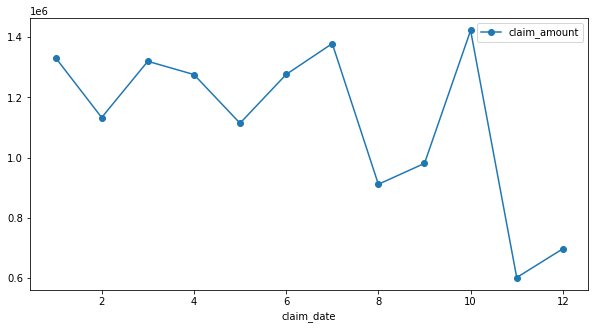

In [62]:
pd.DataFrame(ins_dup.groupby( ins_dup.claim_date.dt.month)['claim_amount'].sum()).plot(kind='line', marker='o',figsize=(10,5))
plt.show()

### 15

In [63]:
non_frd=ins_dup[ins_dup.fraudulent=='No']

In [64]:
yes_frd=ins_dup[ins_dup.fraudulent=='Yes']

In [65]:
non_frd=pd.DataFrame(non_frd.groupby(['gender', 'age_group'])['claim_amount'].mean()).reset_index()
yes_frd=pd.DataFrame(yes_frd.groupby(['gender', 'age_group'])['claim_amount'].mean()).reset_index()

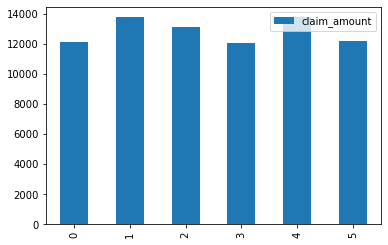

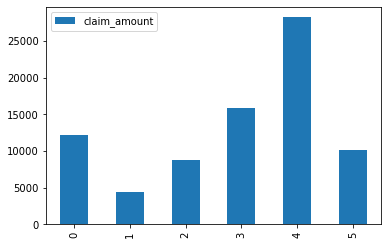

In [66]:
non_frd.plot(kind='bar')
yes_frd.plot(kind='bar')
plt.show()

### 16

## t-Test, Independent sample ttest

In [67]:
male=ins_dup[ins_dup.gender=='Male']

In [68]:
male_claim=male.claim_amount.mean()

In [69]:
female=ins_dup[ins_dup.gender=='Female']

In [70]:
female_claim=female.claim_amount.mean()

In [71]:
print('male_claimed_amt:',male_claim)
print('female_claimed_amt:',female_claim)

male_claimed_amt: 12822.81640625
female_claimed_amt: 12102.1357421875


In [72]:
male_clim=ins_dup.loc[ins_dup.gender=='Male', 'claim_amount']

In [73]:
female_clim=ins_dup.loc[ins_dup.gender=='Female', 'claim_amount']

In [74]:
stats.ttest_ind(female_clim,male_clim)

Ttest_indResult(statistic=-0.8848699394720526, pvalue=0.3764244704744779)

###Business Conclusion: With the data provided, it is discovered that there is a significant similarity in the amount claimed by male and female customers.

### 17

## chi square test

In [75]:
ins_dup.age_group

0       Adult
1       Adult
2       Adult
4       Adult
6       Adult
        ...  
1080    Adult
1081    youth
1082    Adult
1083    Adult
1084    youth
Name: age_group, Length: 1078, dtype: object

In [76]:
ins_dup.Segment

0       Platinum
1         Silver
2         Silver
4         Silver
6           Gold
          ...   
1080    Platinum
1081      Silver
1082        Gold
1083      Silver
1084        Gold
Name: Segment, Length: 1078, dtype: object

In [77]:
pd.crosstab(ins_dup.age_group, ins_dup.Segment)

Segment,Gold,Platinum,Silver
age_group,,,
Adult,282,265,251
Senior,15,17,17
youth,74,79,78


In [78]:
stats.chi2_contingency(pd.crosstab(ins_dup.age_group, ins_dup.Segment))

(1.2651334835621246,
 0.8672627624214679,
 4,
 array([[274.63636364, 267.23376623, 256.12987013],
        [ 16.86363636,  16.40909091,  15.72727273],
        [ 79.5       ,  77.35714286,  74.14285714]]))

###Business Conclusion: With the data provided, it is discovered that there is no significant relationship among these variables.

### 18

## t-Test, one sample t-Test

In [79]:
ins_dup.claim_amount.mean()

12470.51953125

In [80]:
stats.ttest_1samp(ins_dup.claim_amount, 10000)

Ttest_1sampResult(statistic=6.068797826507917, pvalue=1.782718249579708e-09)

###Business conclusion: There is a significant rise in claim amounts as compared to 2016-17

### 19

## f-Test

In [81]:
ins_dup.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact',
       'Segment', '_merge', 'alert_flag', 'age', 'age_group'],
      dtype='object')

In [82]:
ins_dup.age_group.value_counts()

Adult     798
youth     231
Senior     49
Name: age_group, dtype: int64

In [83]:
ins_dup.claim_amount.head(2)

0    2980.0
1    2980.0
Name: claim_amount, dtype: float32

In [84]:
g1 = ins_dup.loc[ins_dup.age_group=='Adult','claim_amount' ]

In [85]:
g2 = ins_dup.loc[ins_dup.age_group=='youth','claim_amount' ]

In [86]:
g3 = ins_dup.loc[ins_dup.age_group=='Senior','claim_amount' ]

In [87]:
ins_dup.loc[ins_dup.age_group=='Adult','claim_amount' ].mean()

12562.5341796875

In [88]:
ins_dup.loc[ins_dup.age_group=='youth','claim_amount' ].mean()

12054.7705078125

In [89]:
ins_dup.loc[ins_dup.age_group=='Senior','claim_amount' ].mean()

12931.6533203125

In [90]:
stats.f_oneway(g1,g2,g3)

F_onewayResult(statistic=0.1595740055155593, pvalue=0.8525270646928547)

###Business conclusion: There is no difference between age groups and insurance claims

### 20

## Correlations

In [91]:
ins_dup.total_policy_claims.head()

0    1.0
1    3.0
2    1.0
4    1.0
6    1.0
Name: total_policy_claims, dtype: float64

In [92]:
ins_dup.claim_amount.head()

0    2980.0
1    2980.0
2    3369.5
4    1680.0
6    2680.0
Name: claim_amount, dtype: float32

In [93]:
stats.pearsonr(ins_dup.total_policy_claims,ins_dup.claim_amount)

(-0.014800926631462366, 0.6273782423038327)

####Business conclusion: There is no strong relationship among the variables